# Simple Linear Regression

Author - Joseph Celi

Using this notebook page we will go through the steps and thought process that a data scientist might take when using simple linear regression to build a predictive model using bivariate data.

___
## Imports

In [252]:
#Seaborn is a Python visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive statistical graphics.

#The %matplotlib inline statement tells iPython notebook to generate our plots inline

In [253]:
import seaborn as sns
%matplotlib inline

## The "tips" data set comes with the Seaborn package

The following code will load the tips datset into a dataframe object.

The dataframe object is defined in pandas

In [154]:
tips = sns.load_dataset('tips')
type(tips)

pandas.core.frame.DataFrame

In [256]:
#We can use the info function to inspect the columns of the dataframe.  We also can find the number of rows.

In [156]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 6.8 KB


In [257]:
#The head function will display the first 5 rows of a dataframe in graphical format.
#Note - you can also specify a number, for example, tips.head(2) would only display the first 2 rows.

In [157]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
#There are many ways to display a scatter plot of the dependent variable x (Total Bill in our case) against
#the independent variable y (tip amount in our case).  

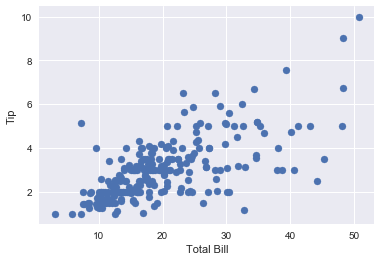

In [158]:
import matplotlib.pyplot as plt

plt.scatter(tips['total_bill'], tips['tip'])
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

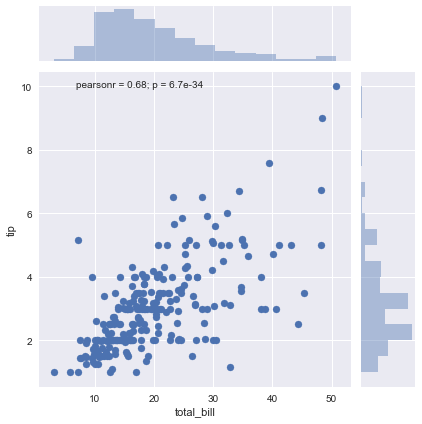

In [159]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


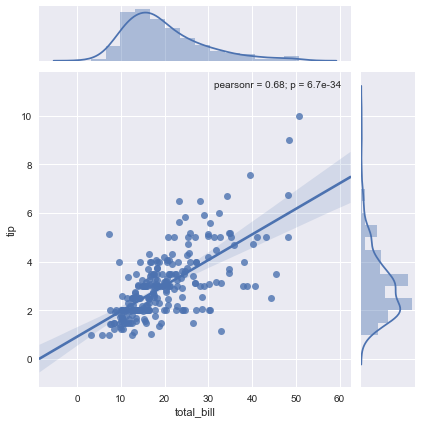

In [160]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

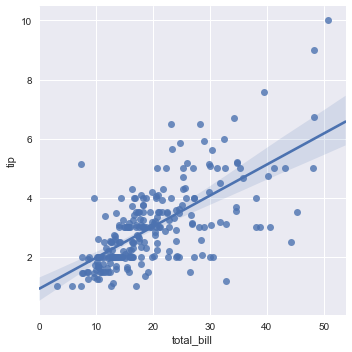

In [161]:
sns.lmplot(x='total_bill',y='tip',data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


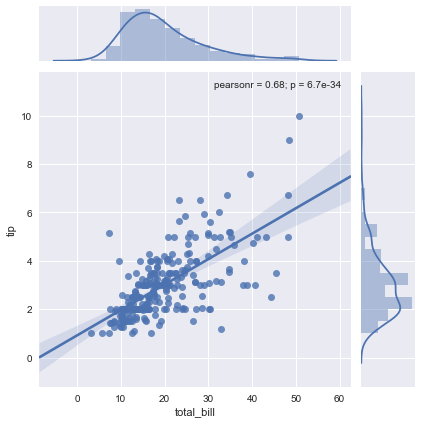

In [258]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

In [ ]:
#We will split our dataset using a 70/30 train/test split.

In [259]:
from sklearn.model_selection import train_test_split

x = tips['total_bill'].values
y = tips['tip'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train_2d = x_train[:, None]
x_test_2d = x_test[:, None]

In [260]:
#For this simple example we are only using one feature (total_bill).  Some of the function require a minimum
#of a 2D array as input (ex. fit function)

In [263]:
print(x_train.shape)
print(x_train.ndim)
print(x_train_2d.shape)
print(x_train_2d.ndim)

print(x_test.shape)
print(x_test.ndim)
print(x_test_2d.shape)
print(x_test_2d.ndim)

(170,)
1
(170, 1)
2
(74,)
1
(74, 1)
2


In [266]:
#Now we will train a model

In [265]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_2d,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [267]:
#Let's obtain our intercept and coefficient

In [269]:
print('Coefficient or B1 ', lm.coef_)
print('Intercept or B0: ', lm.intercept_)

Coefficient or B1  [ 0.10217667]
Intercept or B0:  0.917581215154


In [270]:
#Our equation for the predicted value of the tip 
#Ypt = 0.102x + 0.918

#Let's check this with a test point.  If x == 10 then we should get ~ 1.02+.918 = 1.938

In [203]:
x_test_point = 10.00
tip = lm.predict(x_test_point)
print('tip amount == ', tip)

tip amount ==  [ 1.93934792]


In [272]:
#Close enough :-)

In [271]:
#Now let's obtain the predicted set of tips based on our test data

In [274]:
y_predict_test = lm.predict(x_test_2d)

In [275]:
#Now we will take a look at our model visually

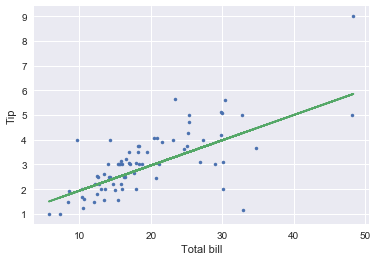

In [276]:
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.plot(x_test, y_test, '.', x_test, y_predict_test, '-')

In [ ]:
#Let's generate the MAE and RMSE

In [277]:
from sklearn import metrics
import numpy as np

print('MAE == ', metrics.mean_absolute_error(y_test, y_predict_test))
print('RMSE == ', np.sqrt(metrics.mean_squared_error(y_test, y_predict_test)))

MAE ==  0.690311906779
RMSE ==  0.933372676777


In [278]:
#Below is another visualization to show our residual error using a histogram of error values

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


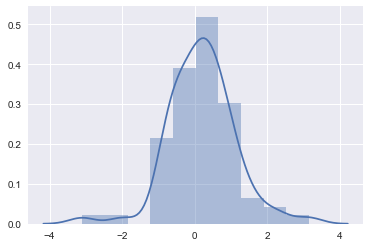

In [279]:
sns.distplot((y_test-y_predict_test),bins=10)

In [ ]:
#Inspect the sorted total bill values in our test set.

In [286]:
x_test[:,]

array([  5.75,   7.25,   8.35,   8.58,   9.6 ,  10.33,  10.33,  10.51,
        10.59,  12.03,  12.16,  12.43,  12.48,  12.66,  12.76,  13.  ,
        13.39,  13.42,  13.51,  14.  ,  14.07,  14.26,  14.31,  14.73,
        15.04,  15.38,  15.42,  15.53,  15.69,  15.77,  15.81,  15.98,
        16.  ,  16.27,  16.4 ,  16.47,  16.93,  16.97,  17.07,  17.59,
        17.89,  17.92,  18.15,  18.24,  18.29,  18.29,  18.78,  19.49,
        20.49,  20.69,  20.92,  21.16,  21.58,  23.1 ,  23.33,  24.59,
        25.  ,  25.21,  25.28,  25.29,  26.88,  27.28,  28.97,  29.8 ,
        29.85,  29.93,  30.06,  30.14,  30.4 ,  32.68,  32.83,  34.65,
        48.17,  48.33])